In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Edge Detection

In [21]:
img = cv2.imread('src/straight.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## Sobel & Scharr Filter
- Gaussian smoothing, 미분
- 노이즈가 있는 이미지에 적합
- 미분 시 소실 정보를 조절하기 위해 aperture_size 이용

### cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
- ddepth : -1이면 input과 동일
- dx, dy : 각 축 미분 차수
- ksize : 커널 사이즈

### cv2.Scharr(src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]]])
- Sobel과 동일하나 ksize : 3x3

## Laplacian
- Sobel의 dx,dy가 2인 경우
- 주위 픽셀과 확연한 차이를 보이는 픽셀 검출에 용이

### cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])

## Canny Edge Detection
- Noise Reduction(Gaussian filter)
- Edge Gradient Detection
- Non-maximum Suppression
- Hysteresis Thresholding

### cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) 
- image : 8-bit
- threshold1,2 : Hysteresis Thresholding min/max

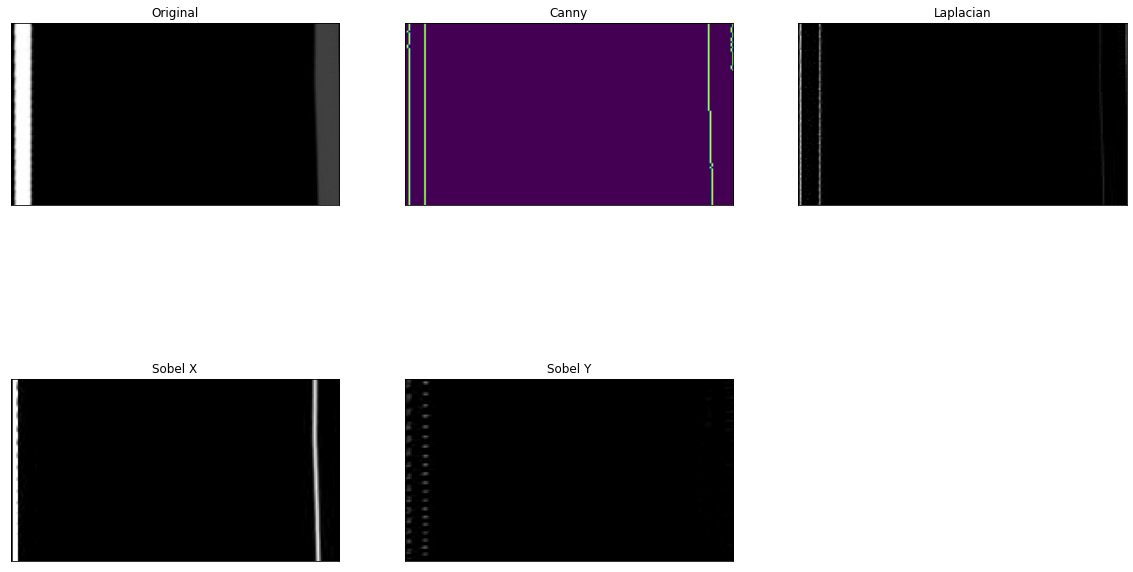

In [36]:

canny = cv2.Canny(img, 70,100)
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U, 1,0,ksize = 3)
sobely = cv2.Sobel(img,cv2.CV_8U, 0,1,ksize = 3)

images = [img, canny, laplacian, sobelx, sobely]
titles = ['Original','Canny','Laplacian','Sobel X','Sobel Y']

plt.figure(figsize = (20,12))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]);plt.yticks([])
plt.show()

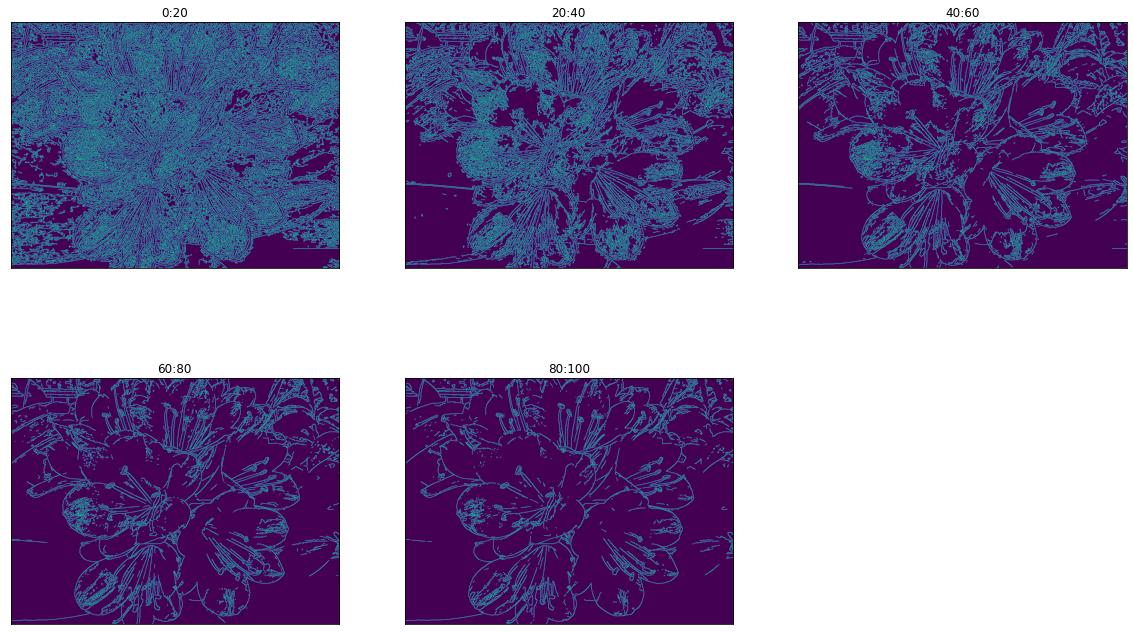

In [42]:
img = cv2.imread('src/flower1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

canny1 = cv2.Canny(img, 0,20)
canny2 = cv2.Canny(img, 20,40)
canny3 = cv2.Canny(img, 40,60)
canny4 = cv2.Canny(img, 60,80)
canny5 = cv2.Canny(img, 80,100)

images = [canny1,canny2,canny3,canny4,canny5]
titles = ['0:20','20:40','40:60','60:80','80:100']
plt.figure(figsize =(20,12))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]);plt.yticks([])
plt.show()

In [ ]:
import time

start = time.time()
for i in range(10000):
    canny = cv2.Canny(img,40,70)

print("Canny 작업 시간 :",time.time()-start)

start = time.time()
for i in range(10000):
    sobel_x = cv2.Sobel(img,cv2.CV_8U,1,0, ksize = 3)
print("Sobel 작업 시간 :",time.time()-start)

start = time.time()
for i in range(10000):
    laplacian = cv2.Laplacian(img,cv2.CV_8U)
print("Laplacian 작업 시간 :",time.time()-start)